<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Hireachical_Clustering_Housing_%2B_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [38]:
# Mounting the Drive
# from google.colab import drive
# drive.mount('/content/drive')

#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import  linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import rand_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, homogeneity_completeness_v_measure, fowlkes_mallows_score

# Hireachical  Clustering 2D - Agglomerative Clustering
- Bottom up Approach

In [40]:
# read the house dataset
# Hireachical clustering works better with smaller dataset.Hence taking lesser row . It is coming error while plotting dendogram whith full rows.
house = pd.read_csv('/content/drive/MyDrive/Colab Work/IIT KGP AI Certification/Dataset/IIT KGP AI - W6 - Housing/housing.csv')[:178]
house.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [41]:
# read the wine dataset
cols = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
'Hue', 'OD280/OD315', 'Proline']
wine = pd.read_csv('/content/drive/MyDrive/Colab Work/IIT KGP AI Certification/Dataset/IIT KGP AI - W6 - Wine/wine.csv',names = cols)
wine.head(2)

,Class,Alcohol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [42]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       178 non-null    float64
 1   HouseAge     178 non-null    float64
 2   AveRooms     178 non-null    float64
 3   AveBedrms    178 non-null    float64
 4   Population   178 non-null    float64
 5   AveOccup     178 non-null    float64
 6   Latitude     178 non-null    float64
 7   Longitude    178 non-null    float64
 8   MedHouseVal  178 non-null    float64
dtypes: float64(9)
memory usage: 12.6 KB


In [43]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Class                178 non-null    int64  
 1   Alcohol              178 non-null    float64
 2   MalicAcid            178 non-null    float64
 3   Ash                  178 non-null    float64
 4   AlcalinityOfAsh      178 non-null    float64
 5   Magnesium            178 non-null    int64  
 6   TotalPhenols         178 non-null    float64
 7   Flavanoids           178 non-null    float64
 8   NonflavanoidPhenols  178 non-null    float64
 9   Proanthocyanins      178 non-null    float64
 10  ColorIntensity       178 non-null    float64
 11  Hue                  178 non-null    float64
 12  OD280/OD315          178 non-null    float64
 13  Proline              178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Principal Component Analysis - Dimensionality Reduction

> If you have 9 features in your original data, PCA with n_components=2 will create a new representation of your data with only 2 features. These 2 features capture the most important variance in the original data.

In [44]:
# house
house_norm = (house-house.min())/(house.max()-house.min())
pca = PCA(n_components=2) #2-dimensional PCA
house_transformed = pd.DataFrame(pca.fit_transform(house_norm))
house_transformed

,0,1
0,0.852620,-0.229325
1,0.736484,0.352346
2,0.636111,-0.385971
3,0.386224,-0.274436
4,0.331736,-0.289116
...,...,...
173,-0.213889,0.214199
174,-0.154507,-0.030547
175,-0.148449,-0.019062
176,-0.136263,-0.038637


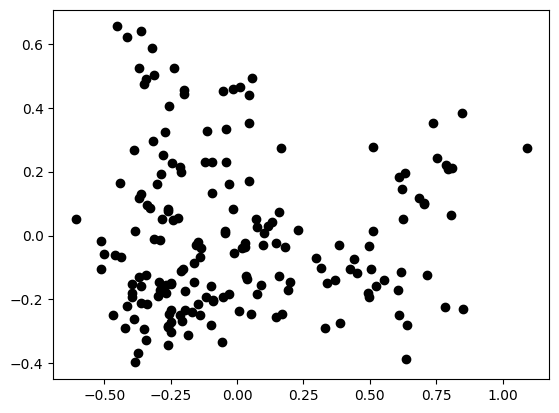

In [45]:
# house
x_house = house_transformed[0]
y_house = house_transformed[1]
plt.scatter(x_house,y_house,color = 'black')
plt.show()

In [46]:
#wine
X_wine = wine.drop('Class',axis=1)
Y_wine = wine['Class']
wine.Class.unique()

array([1, 2, 3])

> wine dataset is classified in 3 diffferent class. So total cluster should be 3. Let's check in upcoming module Linkage  method.

In [47]:
#wine
wine_norm = (X_wine-X_wine.min())/(X_wine.max()-X_wine.min())
pca = PCA(n_components=2) #2-dimensional PCA
wine_transformed = pd.DataFrame(pca.fit_transform(wine_norm))
wine_transformed

,0,1
0,-0.706336,-0.253193
1,-0.484977,-0.008823
2,-0.521172,-0.189187
3,-0.821644,-0.580906
4,-0.202546,-0.059467
...,...,...
173,0.739510,-0.471901
174,0.581781,-0.348366
175,0.626313,-0.546857
176,0.572991,-0.425516


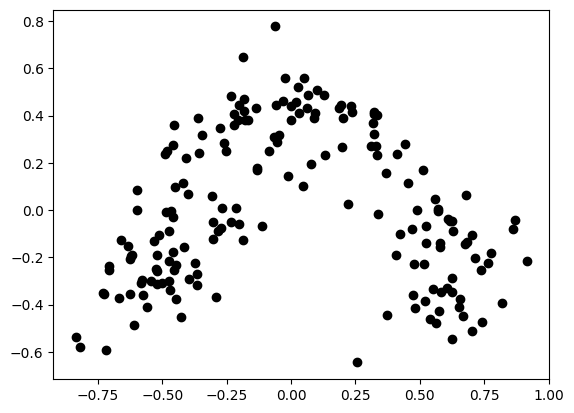

In [48]:
#wine
x_wine = wine_transformed[0]
y_wine = wine_transformed[1]
plt.scatter(x_wine,y_wine,color = 'black')
plt.show()

## Linkage Visualization for  the clusters

> To determine the optimal number of clusters in cluster analysis, specifically in Hireachical clustering.
> Ward Linkage is always best choice to decide number of cluster.

In [49]:
# Min-Linkage
'''
The advantage of the Min method is that it can accurately handle non-elliptical shapes.
The disadvantages are that it is sensitive to noise and outliers.
'''
def  min_linkage (data):
  Z1 = linkage(data, method='single', metric='euclidean')
  return Z1

# Max-Linkage
'''
Max is less sensitive to noise and outliers in comparison to MIN method.
However, MAX can break large clusters and tends to be biased towards globular clusters.
'''
def max_linkage (data):
  Z2 = linkage(data, method='complete', metric='euclidean')
  return Z2

# Average-Linkage
'''
The Average method defines the distance between clusters as the average pairwise distance among all pairs of points in the clusters.
'''
def avg_linkage(data):
  Z3 = linkage(data, method='average', metric='euclidean')
  return Z3

# Ward-Linkage
'''
The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
def ward_linkage(data):
  Z4 = linkage(data, method='ward', metric='euclidean')
  return Z4

# Centroid-Linkage
'''
The Ward method attempts to minimize the sum of the squared distances of the points from the cluster centers.
Compared to the distance-based measures, the Ward method is less susceptible to noise and outliers.
'''
def centroid_linkage(data):
  Z5 = linkage(data, method='centroid', metric='euclidean')
  return Z5


In [50]:
# Single linkage dendogram plot
def single_plot(data):
  Z1 = min_linkage(data)
  plt.plot(2,2,1), dendrogram(Z1), plt.title('Single')
  plt.show()

# Complete linkage dendogram plot
def complete_plot(data):
  Z2 = max_linkage(data)
  plt.plot(2,2,2), dendrogram(Z2), plt.title('Complete')
  plt.show()

# Average linkage dendogram plot
def average_plot(data):
  Z3 = avg_linkage(data)
  plt.plot(2,2,3), dendrogram(Z3), plt.title('Average')
  plt.show()

# Ward linkage dendogram plot
def ward_plot(data):
  Z4 = ward_linkage(data)
  plt.plot(2,2,4), dendrogram(Z4), plt.title('Ward')
  plt.show()

# Centroid linkage dendogram plot
def  centroid_plot(data):
  Z5 = centroid_linkage(data)
  plt.plot(2,2,5), dendrogram(Z5), plt.title('Centroid')
  plt.show()


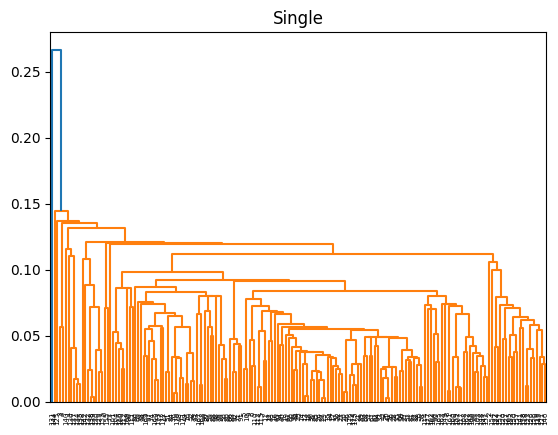

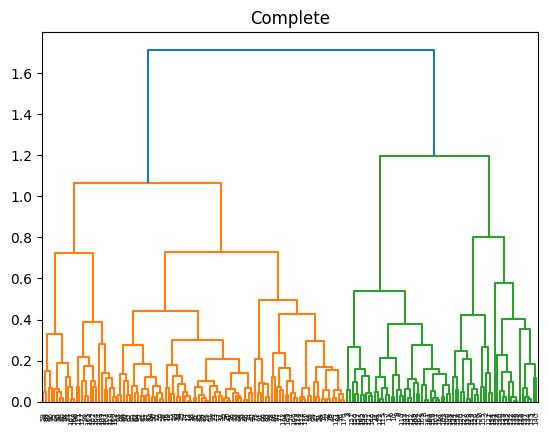

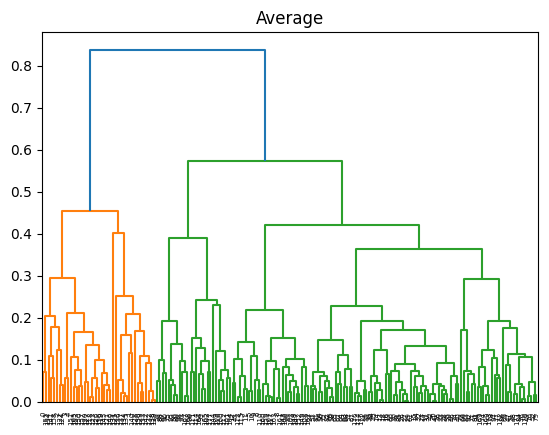

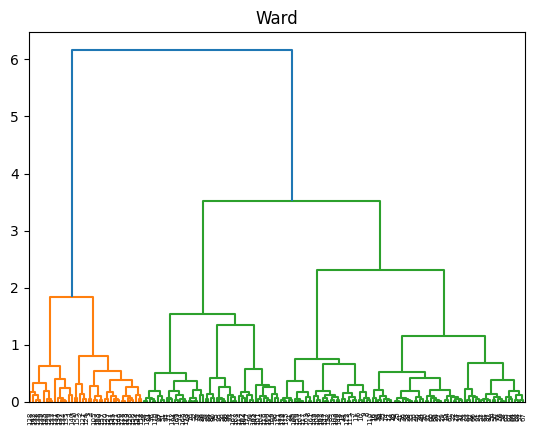

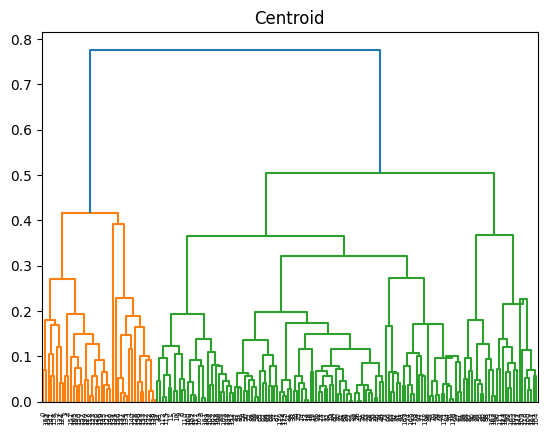

In [51]:
#plotting the dendogram house dataset
single_plot(house_transformed)
print('\n')
complete_plot(house_transformed)
print('\n')
average_plot(house_transformed)
print('\n')
ward_plot(house_transformed)
print('\n')
centroid_plot(house_transformed)

> As per ward dendogram , longest vertical line no Horizontal line passing . i.e.  clusters = 2 .

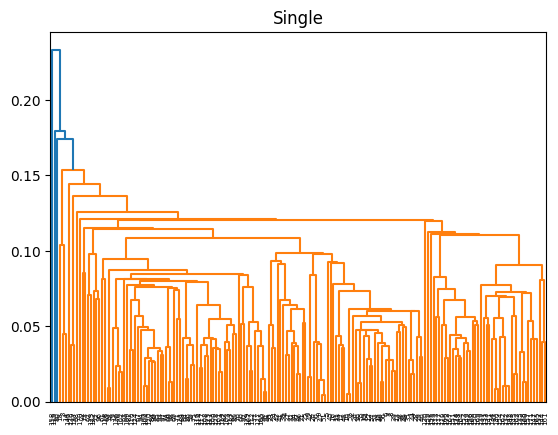

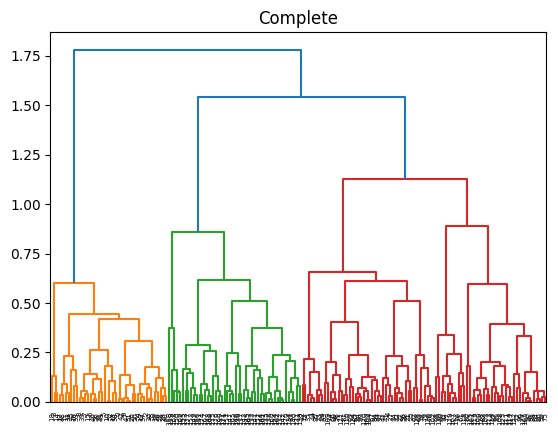

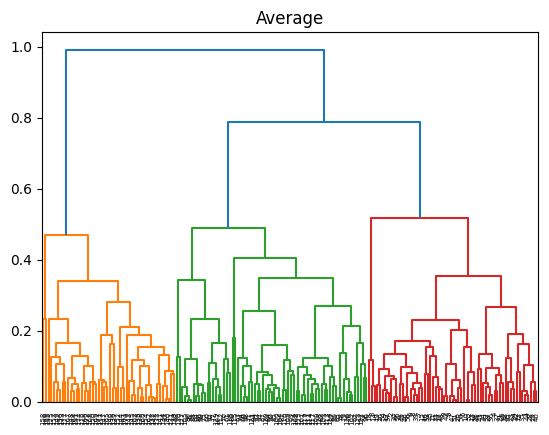

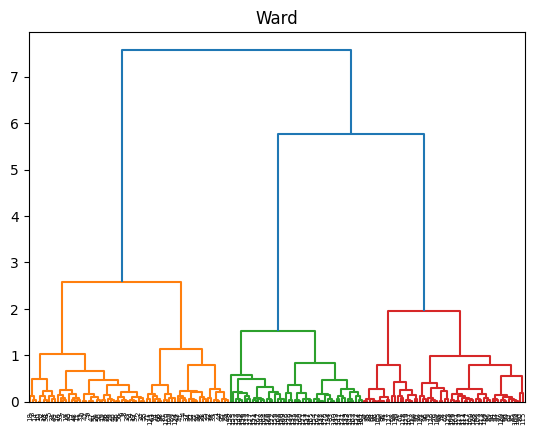

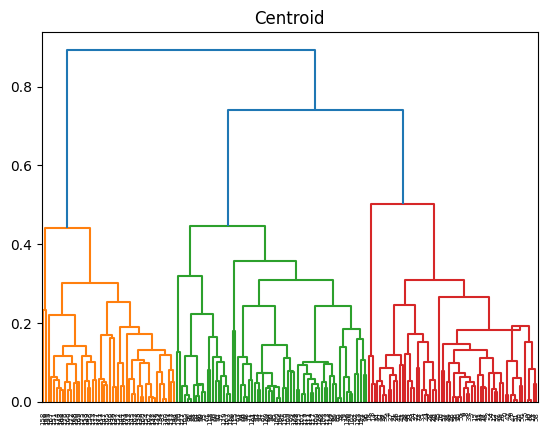

In [52]:
#plotting the dendogram for wine dataset
single_plot(wine_transformed)
print('\n')
complete_plot(wine_transformed)
print('\n')
average_plot(wine_transformed)
print('\n')
ward_plot(wine_transformed)
print('\n')
centroid_plot(wine_transformed)

> As per ward linkage longest vertical line no Horizonatl line passing . i.e. clusters = 3.

## Hireachical  Clustering Model

In [53]:
#house
house_hireachical = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean',linkage = 'ward')
house_hireachical.fit(house_transformed)
house_cluster = house_hireachical.labels_
print(house_cluster)

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


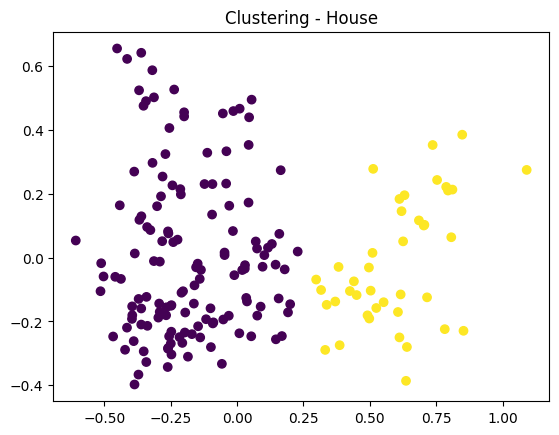

In [54]:
#visualizing the cluster - House
# Z4 = ward_linkage(house_transformed)
#c = fcluster(Z4, 2, criterion='maxclust') # Can also find the lables same as house_hireachical.labels_.
plt.scatter(x_house, y_house, c=house_hireachical.labels_)
plt.title('Clustering - House')
plt.show()

In [55]:
#wine
wine_hireachical = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
wine_hireachical.fit(wine_transformed)
wine_cluster = wine_hireachical.labels_
print(wine_cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0
 0 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


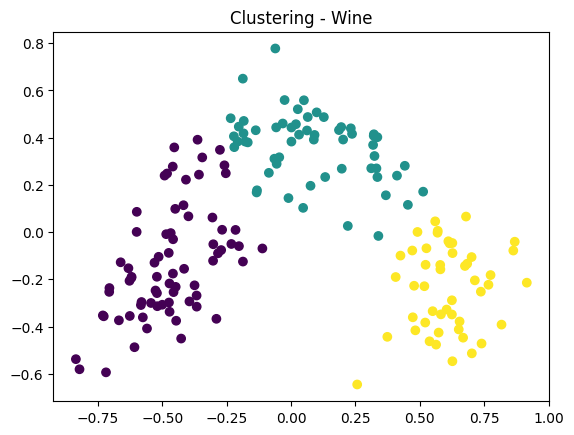

In [56]:
#visualizing the cluster -Wine
# Z4 = ward_linkage(wine_transformed)
#c = fcluster(Z4, 3, criterion='maxclust') # Can also find the lables same as wine_hireachical.labels_.
plt.scatter(x_wine, y_wine, c=wine_hireachical.labels_)
plt.title('Clustering - Wine')
plt.show()

## Score Machenism [Silhouette + Calinski-Harabasz + Davies-Bouldin ]

In [57]:
#  silhouette_score, calinski_harabasz_score, davies_bouldin_score
# without ground truth -- means clustering the dataset without any target variable. Just clustering.
def score_without_truth(data,cluster):
  score_without_house = pd.DataFrame( )
  score_without_house['metrics'] = ['Silhouette Score','Calinski-Harabasz Score','Davies-Bouldin Score']
  score_without_house['Score'] = [silhouette_score(data,cluster,metric='euclidean'),calinski_harabasz_score(data,cluster),davies_bouldin_score(data,cluster)]
  return score_without_house

In [58]:
# house
score_without_house = score_without_truth(house_transformed,house_cluster)
score_without_house

,metrics,Score
0,Silhouette Score,0.521619
1,Calinski-Harabasz Score,202.359798
2,Davies-Bouldin Score,0.681598


## Score Machenism [Rand +Mutual Information  + Homogeneity, completeness and V-measure + Fowlkes-Mallows]

In [59]:
# Rand ,Mutual Information , Homogeneity, completeness and V-measure , Fowlkes-Mallows
# with ground truth -- means clustering the dataset with respective to  target variable.
def score_with_truth(labels_true,labels_pred):
  #print('homogeneity_completeness_v_measure :' , homogeneity_completeness_v_measure(labels_true,labels_pred))
  score_with_wine = pd.DataFrame()
  score_with_wine['metrics'] = ['Rand Score','Adjusted Rand Score','Mutual Information Score','Adjusted Mutual Information Score','Homogeneity Score','Completeness Score','V-measure Score','Fowlkes-Mallows Score']
  score_with_wine['Score'] = [rand_score(labels_true,labels_pred),adjusted_rand_score(labels_true,labels_pred),mutual_info_score(labels_true,labels_pred),
                              mutual_info_score(labels_true,labels_pred),homogeneity_score(labels_true,labels_pred),completeness_score(labels_true,labels_pred),
                              v_measure_score(labels_true,labels_pred),fowlkes_mallows_score(labels_true,labels_pred)]
  return score_with_wine

In [60]:
#wine
labels_true = Y_wine
labels_pred = wine_cluster
score_with_wine = score_with_truth(labels_true,labels_pred)
score_with_wine

,metrics,Score
0,Rand Score,0.890243
1,Adjusted Rand Score,0.754875
2,Mutual Information Score,0.839334
3,Adjusted Mutual Information Score,0.839334
4,Homogeneity Score,0.772840
5,Completeness Score,0.773643
6,V-measure Score,0.773241
7,Fowlkes-Mallows Score,0.837821


# Hireachical Clustering - Data with Higher-Dimensions - Agglomerative Clustering
- Bottom up Approach

In [61]:
# 3D
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
z = [15, 18, 22, 21, 21, 19, 15, 16, 16, 17]

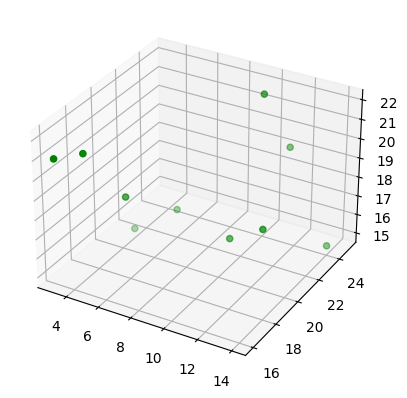

In [62]:
#visualizing the cluster - 3d
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.show()

## Linkage Visualization for the clusters

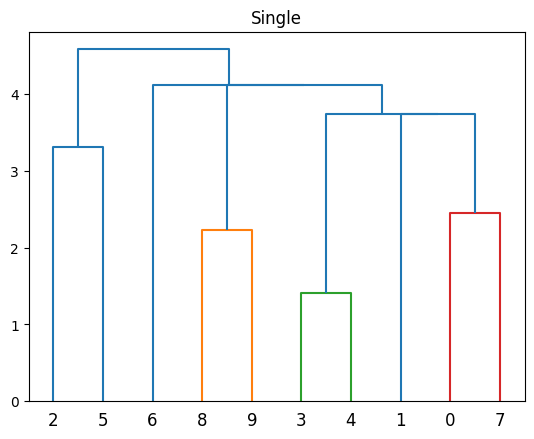

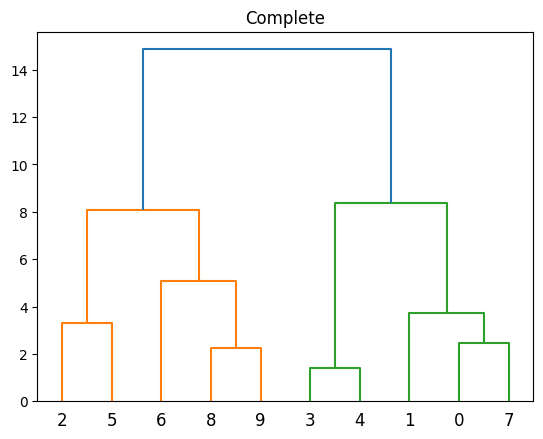

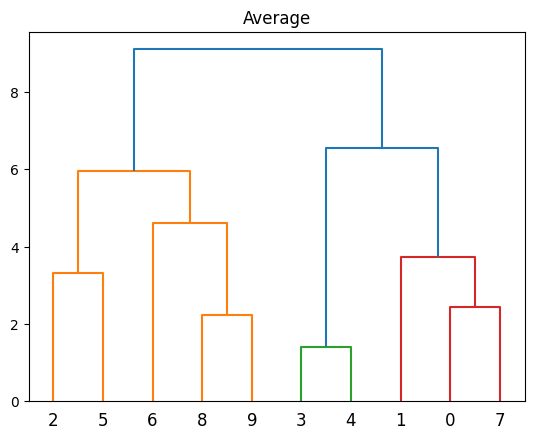

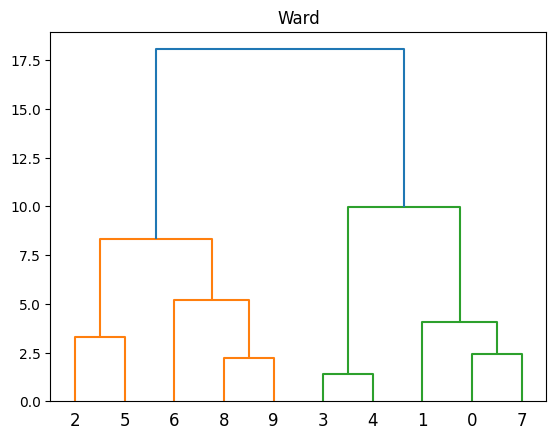

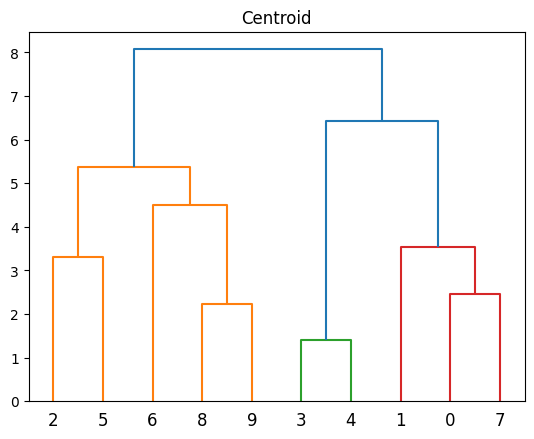

In [63]:
data = list(zip(x,y,z))
#plotting the dendogram
single_plot(data)
print('\n')
complete_plot(data)
print('\n')
average_plot(data)
print('\n')
ward_plot(data)
print('\n')
centroid_plot(data)

> As per ward linkage longest vertical line no Horizonatl line passing . i.e. clusters = 4.

## Hireachical Clustering Model

In [64]:
##modelling
data_hireachical = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean',linkage = 'ward')
data_hireachical.fit(data)
cluster = data_hireachical.labels_
print(cluster)

[1 1 3 2 2 3 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


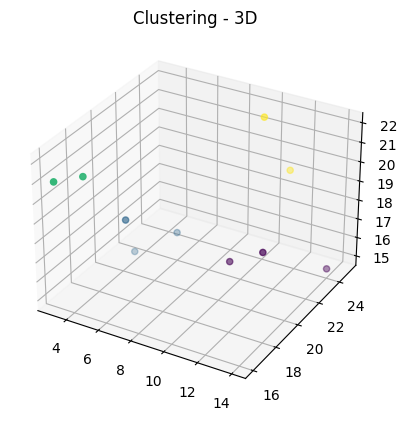

In [65]:
#visualizing the cluster - 3d
# Z4 = ward_linkage(data)
#c = fcluster(Z4, 4, criterion='maxclust') # Can also find the lables same as data_hireachical.labels_.
ax1 = plt.axes(projection ="3d")
ax1.scatter3D(x, y, z, c=data_hireachical.labels_)
plt.title('Clustering - 3D')
plt.show()

## Score Machenism [Silhouette + Calinski-Harabasz + Davies-Bouldin ]

In [66]:
#Score
score_3D = score_without_truth(data,cluster)
score_3D

,metrics,Score
0,Silhouette Score,0.463747
1,Calinski-Harabasz Score,14.604926
2,Davies-Bouldin Score,0.608325


# Hireachical  Clustering 2D  - Divisive Clustering
- Top Down Approach

In [67]:
# it is just reverse of Agglomerative approach.

# Hireachical Clustering - Data with Higher-Dimensions - Divisive Clustering
- Top Down Approach

In [68]:
# it is just reverse of Agglomerative approach.